**NLP TASK 8**

In [ ]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm
from nltk.classify import MaxentClassifier
from nltk.tag import SequentialBackoffTagger
from nltk.tag import UnigramTagger

!pip install -U nltk


nltk.download('treebank')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


corpus = list(treebank.tagged_sents())


train_data = corpus[:int(0.8 * len(corpus))]
test_data = corpus[int(0.8 * len(corpus)):]


hmm_trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = hmm_trainer.train(train_data)


hmm_accuracy = hmm_tagger.evaluate(test_data)
print(f"HMM Tagger Accuracy: {hmm_accuracy:.4f}")



class MaxEntPOSTagger(SequentialBackoffTagger):
    def __init__(self, train_sents, **kwargs):
        super().__init__(**kwargs)
        self.classifier = MaxentClassifier.train(
            [(self._features(word, sent, i), tag)
             for sent in train_sents
             for i, (word, tag) in enumerate(sent)],
            max_iter=10
        )

    def choose_tag(self, tokens, index, history):
        features = self._features(tokens[index], tokens, index)
        return self.classifier.classify(features)

    def _features(self, word, tokens, index):
        return {
            'word': word,
            'is_first': index == 0,
            'is_last': index == len(tokens) - 1,
            'prev_word': '' if index == 0 else tokens[index - 1],
            'next_word': '' if index == len(tokens) - 1 else tokens[index + 1],
            'is_capitalized': word[0].isupper(),
            'suffix-1': word[-1:],
            'suffix-2': word[-2:],
            'suffix-3': word[-3:],
        }


maxent_tagger = MaxEntPOSTagger(train_data)


correct, total = 0, 0
for sent in test_data:
    words = [w for w, t in sent]
    gold_tags = [t for w, t in sent]
    predicted_tags = [t for w, t in maxent_tagger.tag(words)]
    correct += sum(p == g for p, g in zip(predicted_tags, gold_tags))
    total += len(sent)

maxent_accuracy = correct / total
print(f"Maximum Entropy (Log-Linear) Tagger Accuracy: {maxent_accuracy:.4f}")


sentence = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

hmm_prediction = hmm_tagger.tag(sentence)
maxent_prediction = maxent_tagger.tag(sentence)

print("\nHMM Prediction:", hmm_prediction)
print("MaxEnt Prediction:", maxent_prediction)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
/tmp/ipython-input-1347622532.py:30: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  hmm_accuracy = hmm_tagger.evaluate(test_data)
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow en

HMM Tagger Accuracy: 0.3647
  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -3.82864        0.008
      Training stopped: keyboard interrupt
         Final          -1.13272        0.859
Maximum Entropy (Log-Linear) Tagger Accuracy: 0.7645

HMM Prediction: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NNP'), ('fox', 'NNP'), ('jumps', 'NNP'), ('over', 'NNP'), ('the', 'NNP'), ('lazy', 'NNP'), ('dog', 'NNP')]
MaxEnt Prediction: [('The', 'DT'), ('quick', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'NN'), ('dog', '.')]


/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


**NLP TASK 09**

In [ ]:
import nltk
import numpy as np
from sklearn.metrics import accuracy_score

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Download the missing resource

def hmm_pos_tagger(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    return tagged

def log_linear_pos_tagger(sentence):
    tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    return tagged

def compare_performance(sentence):
    hmm_tags = hmm_pos_tagger(sentence)
    log_linear_tags = log_linear_pos_tagger(sentence)

    # Extract only the tags for comparison
    gold_standard_tags = [tag for _, tag in hmm_tags]
    hmm_predicted_tags = [tag for _, tag in hmm_tags]
    log_linear_predicted_tags = [tag for _, tag in log_linear_tags]


    print("HMM Predicted Tags:", hmm_predicted_tags)
    print("Log-Linear Model Predicted Tags:", log_linear_predicted_tags)


    hmm_accuracy = accuracy_score(gold_standard_tags, hmm_predicted_tags)
    log_linear_accuracy = accuracy_score(gold_standard_tags, log_linear_predicted_tags)

    print("HMM Accuracy:", hmm_accuracy)
    print("Log-Linear Model Accuracy:", log_linear_accuracy)


input_text = "The quick brown fox jumps over the lazy dog."
compare_performance(input_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


HMM Predicted Tags: ['DT', 'JJ', 'NN', 'NN', 'VBZ', 'IN', 'DT', 'JJ', 'NN', '.']
Log-Linear Model Predicted Tags: ['DT', 'JJ', 'NN', 'NN', 'VBZ', 'IN', 'DT', 'JJ', 'NN', '.']
HMM Accuracy: 1.0
Log-Linear Model Accuracy: 1.0


**NLP TASK 10**

In [1]:
from bs4 import BeautifulSoup
import spacy

nlp = spacy.load("en_core_web_sm")

def pos_tag_and_extract_info(text):
    doc = nlp(text)
    nouns = []
    verbs = []
    adjectives = []
    entities = []
    for token in doc:
        if token.pos_ == "NOUN":
            nouns.append(token.text)
        elif token.pos_ == "VERB":
            verbs.append(token.text)
        elif token.pos_ == "ADJ":
            adjectives.append(token.text)
    for entity in doc.ents:
        entities.append((entity.text, entity.label_))
    return nouns, verbs, adjectives, entities

web_document = """
<html>
<head>
<title>Example Web Page</title>
</head>
<body>
<p>This is an example web page. It contains some text with various parts of speech.</p>
<p>For example, "The cat jumps over the lazy dog" contains a noun, a verb, and prepositions.</p>
</body>

</html>
"""

def extract_text_from_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

text_content = extract_text_from_html(web_document)
nouns, verbs, adjectives, entities = pos_tag_and_extract_info(text_content)

print("Nouns:", nouns)
print("Verbs:", verbs)
print("Adjectives:", adjectives)
print("Entities:", entities)

Nouns: ['Web', 'example', 'web', 'page', 'text', 'parts', 'speech', 'example', 'cat', 'dog', 'verb', 'prepositions']
Verbs: ['contains', 'jumps', 'contains']
Adjectives: ['various', 'lazy']
Entities: []


**NLP TASK 11**

In [8]:
import re
import requests
import torch
import torch.nn as nn
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Define simple LSTM model
class ChunkerModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.lstm = nn.LSTM(128, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(self.lstm(x)[0][:, -1, :]))

# Function to fetch text from Wikipedia
def fetch_text(url):
    headers = {"User-Agent": "Mozilla/5.0"}  # avoid 403 errors
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract only paragraphs from main content
    paragraphs = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]
    text = ' '.join(paragraphs)

    # Clean text — remove references like [1], [2]
    text = re.sub(r'\[\d+\]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess text
def preprocess(text):
    tok = Tokenizer(num_words=5000)
    tok.fit_on_texts([text])
    seq = tok.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=100, padding='post')
    return padded, tok

# Split text into chunks (sentences)
def segment_text(url):
    text = fetch_text(url)
    if not text:
        return ["No text extracted. Check URL or connection."]
    seq, tok = preprocess(text)
    # Split into first 5 sentences (safe split)
    sentences = re.split(r'(?<=[.!?]) +', text)
    return sentences[:5]

# Display output
print("Extracted Chunks:")
for chunk in segment_text("https://en.wikipedia.org/wiki/Natural_language_processing"):
    print(chunk)


Extracted Chunks:
Natural language processing (NLP) is the processing of natural language information by a computer.
The study of NLP, a subfield of computer science, is generally associated with artificial intelligence.
NLP is related to information retrieval, knowledge representation, computational linguistics, and more broadly with linguistics.
Major processing tasks in an NLP system include: speech recognition, text classification, natural language understanding, and natural language generation.
Natural language processing has its roots in the 1950s.


**NLP TASK 12**

/tmp/ipython-input-2953837492.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='viridis')


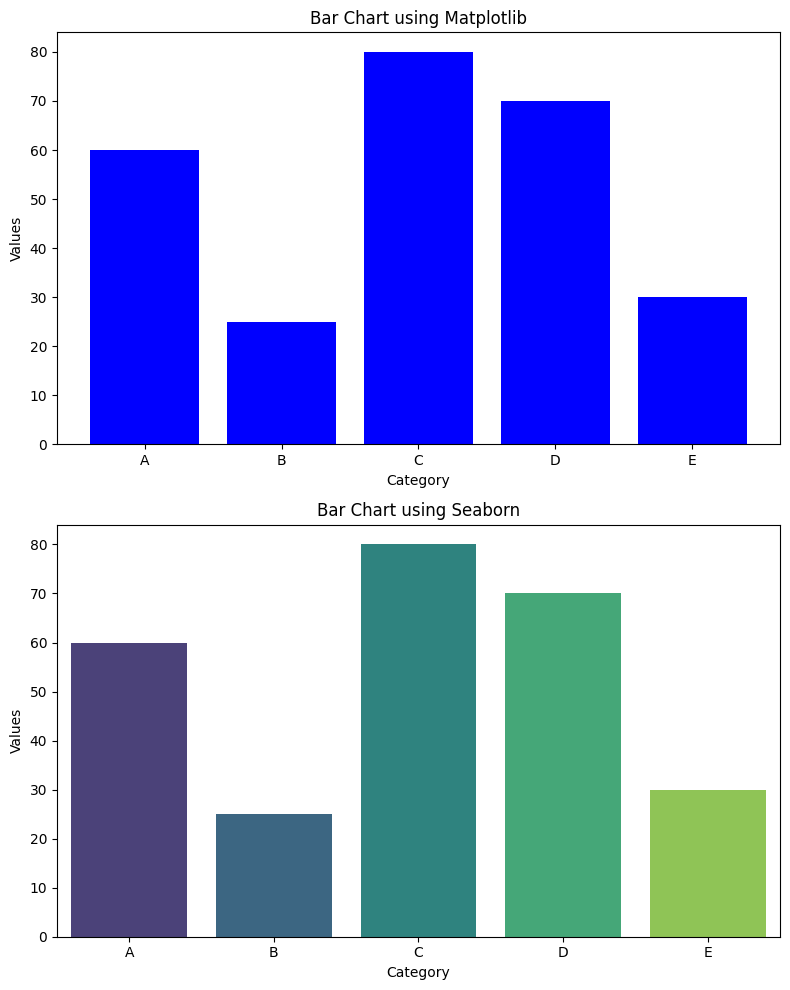

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['A', 'B', 'C', 'D', 'E']
values = [60, 25, 80, 70, 30]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.bar(categories, values, color='blue')
plt.title('Bar Chart using Matplotlib')
plt.xlabel('Category')
plt.ylabel('Values')

plt.subplot(2, 1, 2)
sns.barplot(x=categories, y=values, palette='viridis')
plt.title('Bar Chart using Seaborn')
plt.xlabel('Category')
plt.ylabel('Values')


plt.tight_layout()


plt.show()
